In [152]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

Captsone Project - Week 3 :
    Part 1 - Scrapping wikipedia and create then clean new dataset  

In [153]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

First at all, we request the url wikipedia. Then we use the BeautifulSoup library to get the page's content. 
Then we put it in a table as we find the tag "table" containing the class "wikitable sortable".
Finally, we put the content of the table into a pandas' dataframe.

In [154]:
req = requests.get(url)
soup = BeautifulSoup(req.text, "html.parser")
table = soup.find("table", {"class":"wikitable sortable"})
df = pd.read_html(str(table))[0]

We have now to clean de dataframe. First at all, let's clean raws containing "Not assigned" in Borough column. 

In [155]:
df = df.drop(df[df['Borough'] == "Not assigned"].index)
df

,Postal Code,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


Then, we need to verify if there is raw containing a Borough, but with a "Not assigned" value in Neighbourhood

In [156]:
df.loc[df['Neighbourhood'] == "Not assigned"]

,Postal Code,Borough,Neighbourhood


The pandas' dataframe seems to be clean right now, let's change index and 
go further.

In [157]:
index = range(df.shape[0])
df.index = index
df

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [158]:
df.shape

(103, 3)

Captsone Project - Week 3 :
    Part 2 - Get geoloc data and complete pandas' dataframe  

In [159]:
file = "Geospatial_Coordinates.csv"
df_coord = pd.read_csv(file)
df_coord

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


We read the file then put the content into a new pandas dataframe. Let's join the two dataframe right now.

In [160]:
df = pd.merge(df, df_coord, on="Postal Code", how="inner")

In [161]:
df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


Captsone Project - Week 3 :
    Part 3 - Work with Toronto Borough and create clusters

Now, let's find the borough that contains the substring "Toronto" and stock the dataframe resulting in the variable Toronto_df.

In [162]:
Toronto_df = df.loc[df['Borough'].str.contains("Toronto")]
Toronto_df

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
19,M4E,East Toronto,The Beaches,43.676357,-79.293031
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650571,-79.384568
31,M6H,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259


We import the library that we will need in order to finish that part of the project

In [163]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
from sklearn.cluster import KMeans #Clustering fonction
#plotting modules from matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
!conda install -c conda-forge folium=0.5.0 --yes 

import folium # map rendering library

import json # library to handle JSON files
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



We get first at all the Toronto's location

In [319]:
address = 'Toronto, TO'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6708625, -79.37279241253721.


We create the map then we put the interess points that we gathered before

In [166]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

In [167]:
for lat, lng, borough, neighborhood in zip(Toronto_df['Latitude'], Toronto_df['Longitude'], Toronto_df['Borough'], Toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [322]:
# @hidden_cell
CLIENT_ID = 'ODSQTRMSAFMCAM53ZP5ZJ4Y0DJECUY1DJQCNL3TEQFX03FO5' # your Foursquare ID
CLIENT_SECRET = 'BUIC2UJZOZ3OKMHHQYSIX3MKUIX0UZKSC2GEYVCQI5YAKPQ4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

We define the function that will help us to gather the nearby venue at one location, with a radius of 500 meter

In [169]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

We gather all the Toronto venues

In [170]:
Toronto_venues = getNearbyVenues(names=Toronto_df['Neighbourhood'],
                                   latitudes=Toronto_df['Latitude'],
                                   longitudes=Toronto_df['Longitude']
                                  )

Regent Park, Harbourfront
Queen's Park, Ontario Provincial Government
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
The Danforth West, Riverdale
Toronto Dominion Centre, Design Exchange
Brockton, Parkdale Village, Exhibition Place
India Bazaar, The Beaches West
Commerce Court, Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West, Forest Hill Road Park
High Park, The Junction South
North Toronto West, Lawrence Park
The Annex, North Midtown, Yorkville
Parkdale, Roncesvalles
Davisville
University of Toronto, Harbord
Runnymede, Swansea
Moore Park, Summerhill East
Kensington Market, Chinatown, Grange Park
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
R

Then we create a one hot encoding to transform categorical variable into numerical variable

In [211]:
# one hot encoding
toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We verify the shape of the one hot encoding dataframe, then we transform this into a frequency dataframe

In [174]:
toronto_onehot.shape

(1604, 236)

In [199]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Adult Boutique,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,Berczy Park,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.00000,0.00,0.018182,0.00000,0.000000,0.000000,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
2,"Business reply mail Processing Centre, South C...",0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
3,"CN Tower, King and Spadina, Railway Lands, Har...",0.000000,0.0000,0.055556,0.055556,0.055556,0.111111,0.166667,0.111111,0.000000,...,0.0000,0.00000,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
4,Central Bay Street,0.016667,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.00000,0.00,0.016667,0.00000,0.000000,0.016667,0.000000
5,Christie,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
6,Church and Wellesley,0.025000,0.0125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012500,...,0.0125,0.00000,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
7,"Commerce Court, Victoria Hotel",0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,...,0.0000,0.00000,0.000000,0.00000,0.00,0.020000,0.00000,0.000000,0.010000,0.000000
8,Davisville,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.029412,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000
9,Davisville North,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.00000,0.000000,0.00000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000


We create a function and a dataframe allowing us to see the top venue for each neighborhood

In [201]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [309]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Cheese Shop,Restaurant,Seafood Restaurant,Farmers Market,Beer Bar,Bakery,Sporting Goods Shop,Hotel
1,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Nightclub,Gym,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue
2,"Business reply mail Processing Centre, South C...",Park,Garden Center,Light Rail Station,Brewery,Farmers Market,Fast Food Restaurant,Burrito Place,Restaurant,Garden,Auto Workshop
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Coffee Shop,Harbor / Marina,Rental Car Location,Sculpture Garden,Plane,Bar,Boat or Ferry
4,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Burger Joint,Bubble Tea Shop,Salad Place,Pizza Place,Ice Cream Shop,Indian Restaurant


We create a graph of Kmeans model VS Inertia to know the best K parameter we need to set. We find that this is K = 4

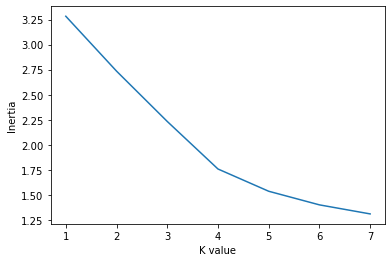

In [310]:
# set the max number of clusters
kclusters_max = 7
variances = []
kmeans = []
K = [i for i in range(1,kclusters_max+1)]
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
for i in range(1,kclusters_max+1):
    variance=0
    model_KM = KMeans(n_clusters=i, random_state=1).fit(toronto_grouped_clustering)
    kmeans.append(model_KM)
    variances.append(model_KM.inertia_)

plt.plot(K,variances)
plt.ylabel("Inertia")
plt.xlabel("K value")
plt.xticks([i for i in range(1,kclusters_max+1)])
plt.show()

We try many initialisation with the modification of random_state parameter. We get the index of the minimum of inertia, meaning that this is the best initialisation for K = 4

In [311]:
# set number of clusters
kclusters = 4
states = [i for i in range(100)]
variances_random = []
Kmeans_random = []
for i in range(len(states)):
    variance=0
    model_KM = KMeans(n_clusters=4, random_state=i).fit(toronto_grouped_clustering)
    Kmeans_random.append(model_KM)
    variances_random.append(model_KM.inertia_)
print(min(variances_random))
index_min = variances_random.index(min(variances_random))


1.7581082593101849


We use the model with K = 4 and random_state = 1

In [312]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', Kmeans_random[index_min].labels_)
Toronto_df = Toronto_df.rename(columns={"Neighbourhood":"Neighborhood"})
toronto_merged = Toronto_df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,3,Coffee Shop,Pub,Park,Bakery,Breakfast Spot,Theater,Café,Wine Shop,Electronics Store,Performing Arts Venue
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,3,Coffee Shop,Sushi Restaurant,Gym,Distribution Center,Portuguese Restaurant,Park,Nightclub,Mexican Restaurant,Japanese Restaurant,Italian Restaurant
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,3,Clothing Store,Coffee Shop,Café,Japanese Restaurant,Italian Restaurant,Hotel,Middle Eastern Restaurant,Bubble Tea Shop,Cosmetics Shop,Pizza Place
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,3,Coffee Shop,Café,Gastropub,Cocktail Bar,American Restaurant,Gym,Moroccan Restaurant,Restaurant,Park,Cosmetics Shop
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,3,Coffee Shop,Pub,Trail,Health Food Store,Wine Shop,Dog Run,Dessert Shop,Diner,Discount Store,Distribution Center


We create the map showcasing the model with the different clusters that we made. One cluster seems to gather many of the neighborhood

In [318]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

We can see the distribution of cluster. There is 34 neighborhood in one cluster. We should maybe change our choice on the distance that we put in the algorithm

In [316]:
for i in range(kclusters):
    print(toronto_merged.loc[toronto_merged['Cluster Labels'] == i, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]].shape)

(3, 12)
(1, 12)
(1, 12)
(34, 12)
